In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder #for train test splitting
from sklearn.model_selection import train_test_split #for decision tree object
from sklearn.tree import DecisionTreeClassifier #for checking testing results
from sklearn.metrics import classification_report, confusion_matrix #for visualizing tree 
from sklearn.tree import plot_tree

In [3]:
df = pd.read_csv("aut.csv")
df.head()

,Dist,Fuel,Body_characteristics,Sensors,Match_of_the_route,Efficiency_by_platoon
0,500,700,1,5,300,yes
1,1000,1500,2,8,984,yes
2,2200,3500,3,10,2603,no
3,1200,1600,2,8,961,yes
4,2100,3400,3,10,2549,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Dist                   30 non-null     int64 
 1   Fuel                   30 non-null     int64 
 2   Body_characteristics   30 non-null     int64 
 3    Sensors               30 non-null     int64 
 4   Match_of_the_route     30 non-null     int64 
 5   Efficiency_by_platoon  30 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.5+ KB


In [5]:
df.shape

(30, 6)

In [6]:
df.isnull().any()

Dist                     False
Fuel                     False
Body_characteristics     False
 Sensors                 False
Match_of_the_route       False
Efficiency_by_platoon    False
dtype: bool

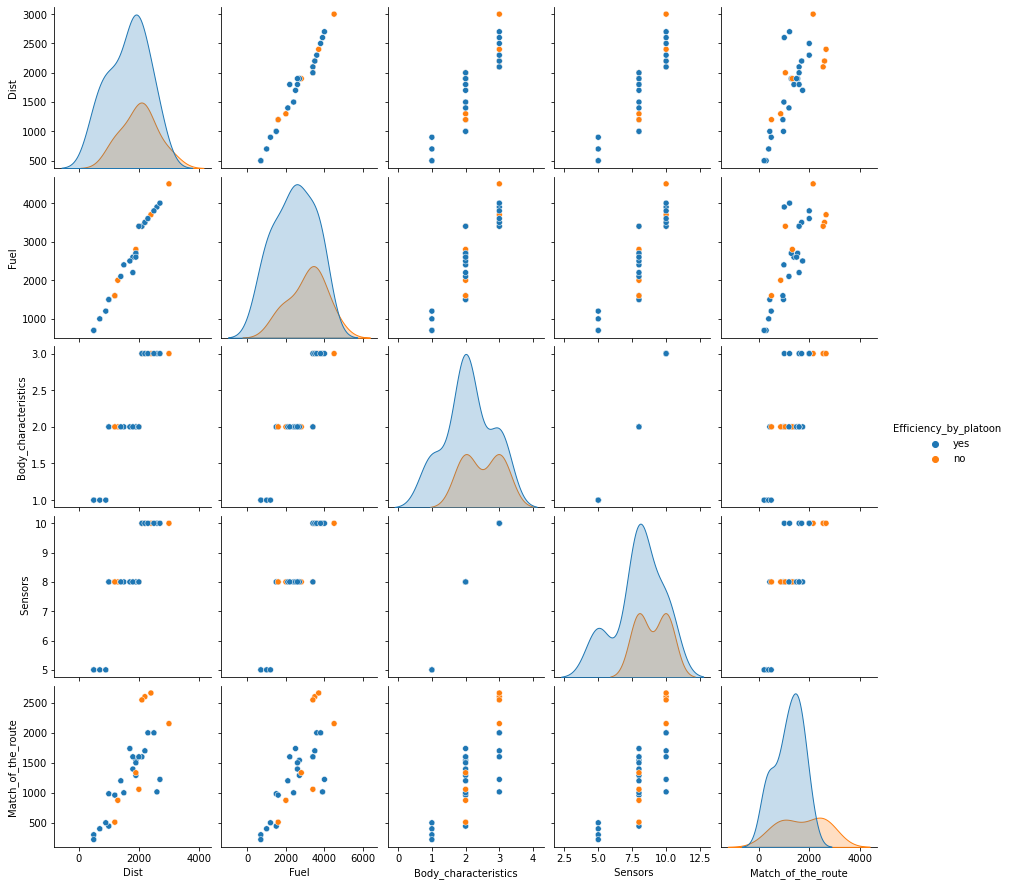

In [7]:
sns.pairplot(data=df, hue = 'Efficiency_by_platoon')

In [8]:
target = df['Efficiency_by_platoon']
df1 = df.copy()
df1 = df1.drop('Efficiency_by_platoon', axis =1)

In [9]:
X = df1

In [10]:
target

0     yes
1     yes
2      no
3     yes
4      no
5     yes
6     yes
7     yes
8     yes
9     yes
10    yes
11    yes
12     no
13     no
14     no
15     no
16     no
17    yes
18    yes
19    yes
20    yes
21     no
22    yes
23    yes
24    yes
25    yes
26    yes
27    yes
28    yes
29    yes
Name: Efficiency_by_platoon, dtype: object

In [11]:
le = LabelEncoder()
target = le.fit_transform(target)
target

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
y = target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 1)

In [14]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
y_pred = model.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      1.00      0.80         4

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6



C:\Users\Omkar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Omkar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Omkar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

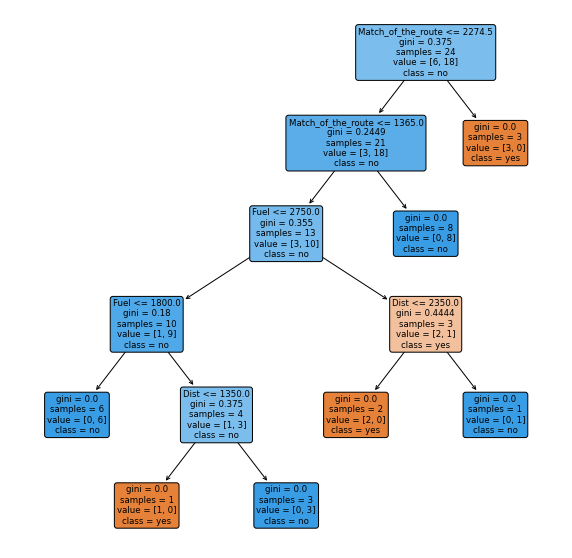

In [33]:
plt.figure(figsize=(10, 10)) 
plot_tree(decision_tree=model, feature_names = df1.columns, 
                     class_names =["yes", "no"] , filled = True , precision = 4, rounded = True)
plt.show()